In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class_name = ['happy', 'angry', 'sad']

In [23]:
saved_model_path = tf.keras.models.load_model("EF-Net-B7")
saved_model_path.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional  (None, None, None, 2560   64097687  
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 2560)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 8)                 20488     
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544   

In [24]:
img_path = 'download.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

In [25]:
# Preprocess the image
img_array = img_array / 255.0  # Normalize the pixel values

In [26]:
# Make predictions
predictions = saved_model_path.predict(img_array)

1/1 [==============================] - 7s 7s/step


In [27]:
# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

In [28]:
# Get the predicted class label
predicted_class_label = class_name[predicted_class_index]

In [29]:
# Get the probability score of the predicted class
predicted_score = predictions[0][predicted_class_index]

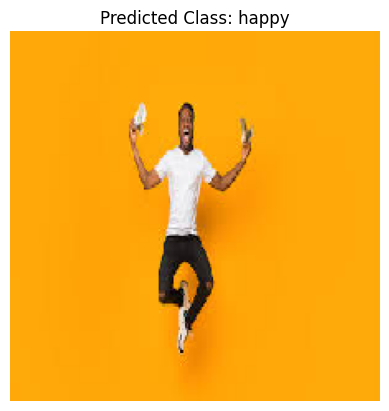

In [30]:
# Visualize the image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_label}')
plt.show()